In [0]:
# Library import
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
N = 3  # Maximum number of possible peak
Data_size = 300000  

Parameters = np.zeros((Data_size, N, 2))  # Set of Parameters ready

print(Parameters.shape[1])

3


In [0]:
# Lorentzian function that returns sum of multi-Lorentzian function with two arguments
def Lorentzian(x, *args):
    ''' returns sum of Multi-Lorentzian function 
    corresponding to each two arguments (a, b)'''
    a = args[::2]
    b = args[1::2]

    result = 0
    for i in range(len(a)):
        if a[i] > 0 and b[i] > 0:
            if len(a) == len(b):
                result += b[i] ** 2 / ((x - a[i])**2 + b[i]**2)
    return result 
    # noise = -0.2 ~ 0.2 

In [4]:
# X domain fixed
x = np.arange(-2, 2, 0.01)
print(len(x))

400


In [5]:
for i in range(len(Parameters)): # For each matrix in Parameter set...

    for j in range(Parameters.shape[1]): # For each raw in each matrix...
        
        # append two argument that will be used in Lorentzian function
        # Second parameter is constrained in range from 0.1 to 0.2
        Parameters[i][j] = np.array([[np.random.rand(), 0.1*np.random.rand() + 0.1]])
    
# Check out
print(Parameters)

[[[0.73703674 0.15503155]
  [0.26055462 0.18780426]
  [0.46300654 0.17498724]]

 [[0.57915679 0.12694064]
  [0.9219188  0.17368272]
  [0.45199815 0.1088797 ]]

 [[0.33525053 0.17948745]
  [0.49122197 0.1515181 ]
  [0.72466856 0.13906245]]

 ...

 [[0.4084065  0.19557921]
  [0.84421573 0.13912967]
  [0.13576874 0.14424019]]

 [[0.47959554 0.18206804]
  [0.50276827 0.15279359]
  [0.85399826 0.13974678]]

 [[0.00511477 0.12271543]
  [0.61526018 0.11787037]
  [0.15984252 0.17220648]]]


In [0]:
# ================== Data Generating ================
Data_x = []
Data_y = []
Data_x3 = []
for j in Parameters:  # For each parameter matrix...

    peak = random.randint(3, N) # Random selection of Possible peak number
    j = list(j.reshape((2*N,))) # reshape processing to put it as *args in function, Since j is matrix

    if peak == 1: 
        Data_x.append(Lorentzian(x, *j[0:2]))
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:2])), peak, j[0], -1, -1, -1, -1]))

    elif peak == 2:
        Data_x.append(Lorentzian(x, *j[0:4]))
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:4])), peak, j[0], j[2], -1, -1, -1 ]))

    elif peak == 3:
        Data_x.append(Lorentzian(x, *j[0:6]))
        Data_x3.append(np.array([Lorentzian(x, *j[0:2]),Lorentzian(x, *j[2:4]), Lorentzian(x, *j[4:6])])) 
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:6])) ,peak, j[0], j[2], j[4], -1, -1 ]))

    elif peak == 4:
        Data_x.append(Lorentzian(x, *j[0:8]))
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:8])), peak, j[0], j[2], j[4], j[6], -1 ]))

    elif peak == 5:
        Data_x.append(Lorentzian(x, *j[0:]))
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:])), peak, j[0], j[2], j[4], j[6], j[8] ]))



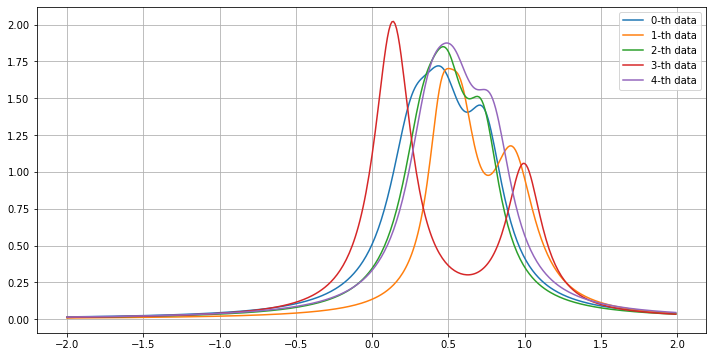

In [7]:
# Generated Data sample check!
plt.figure(figsize=(12, 6))

for i in range(5):
    plt.plot(x, Data_x[i], label = str(i) + '-th data')
    plt.legend()
    plt.grid('on')
    

In [8]:
Data_x3 = np.array(Data_x3)
Data_x3.shape

(300000, 3, 400)

In [9]:
Data_x3 = Data_x3.reshape(300000, 1200)
Data_x3.shape

(300000, 1200)

In [0]:
# Data spliting up into three group : training / validation / test

train_data = np.array(Data_x[:150000])
val_data = np.array(Data_x[150000:250000])
test_data = np.array(Data_x[250000:])

train_labels = np.array(Data_y[:150000])
val_labels = np.array(Data_y[150000:250000])
test_labels = np.array(Data_y[250000:])

In [0]:
train_data_3 = np.array(Data_x3)

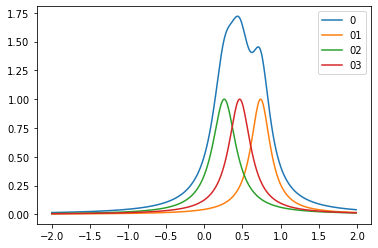

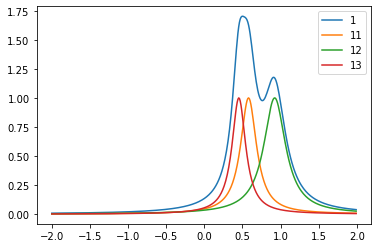

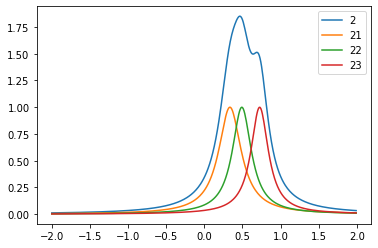

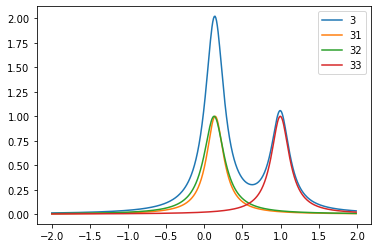

In [12]:
for i in range(4):
    plt.plot(x, train_data[i], label=str(i))
    plt.plot(x, Data_x3[i][:400], label=str(i) + '1')
    plt.plot(x, Data_x3[i][400:800], label = str(i) + '2')
    plt.plot(x, Data_x3[i][800:], label = str(i) + '3')
    plt.legend()
    plt.show()

In [13]:
# size test

print(train_data.shape, train_labels.shape)
print(val_data.shape, val_labels.shape)
print(test_data.shape, test_labels.shape)

(150000, 400) (150000, 7)
(100000, 400) (100000, 7)
(50000, 400) (50000, 7)


In [14]:
# Autoencoder activate

# 코랩에서는 다음 코드로 베타버전을 설치한다.
!pip install tensorflow-gpu==2.0.0-rc
!apt install -y -q fonts-nanum

     |████████████████████████████████| 380.5MB 49kB/s 
     |████████████████████████████████| 4.3MB 54.5MB/s 
     |████████████████████████████████| 501kB 50.4MB/s 
Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,420 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [0]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

import tensorflow
from tensorflow.keras.datasets import mnist
import numpy as np

In [31]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential

autoencoder1 = Sequential()
autoencoder1.add(Dense(100, input_dim=400, activation='relu'))
autoencoder1.add(Dense(400, activation='relu'))

autoencoder1.add(Dense(1200))
autoencoder1.compile(optimizer="adam", loss=""", metrics=['mae'])

autoencoder1.summary()

SyntaxError: ignored

In [27]:
%%time
history = autoencoder1.fit(train_data, Data_x3[:150000], epochs=30, batch_size=2000, 
                           validation_data = (val_data, Data_x3[150000:250000]),
                           verbose=2)

Train on 150000 samples, validate on 100000 samples
Epoch 1/30
150000/150000 - 2s - loss: 0.0295 - mae: 0.0979 - val_loss: 0.0194 - val_mae: 0.0731
Epoch 2/30
150000/150000 - 2s - loss: 0.0189 - mae: 0.0702 - val_loss: 0.0186 - val_mae: 0.0684
Epoch 3/30
150000/150000 - 2s - loss: 0.0185 - mae: 0.0678 - val_loss: 0.0184 - val_mae: 0.0672
Epoch 4/30
150000/150000 - 2s - loss: 0.0184 - mae: 0.0670 - val_loss: 0.0183 - val_mae: 0.0666
Epoch 5/30
150000/150000 - 2s - loss: 0.0184 - mae: 0.0667 - val_loss: 0.0183 - val_mae: 0.0664
Epoch 6/30
150000/150000 - 2s - loss: 0.0183 - mae: 0.0665 - val_loss: 0.0183 - val_mae: 0.0663
Epoch 7/30
150000/150000 - 2s - loss: 0.0183 - mae: 0.0663 - val_loss: 0.0183 - val_mae: 0.0661
Epoch 8/30
150000/150000 - 2s - loss: 0.0183 - mae: 0.0662 - val_loss: 0.0183 - val_mae: 0.0661
Epoch 9/30
150000/150000 - 2s - loss: 0.0183 - mae: 0.0661 - val_loss: 0.0183 - val_mae: 0.0659
Epoch 10/30
150000/150000 - 2s - loss: 0.0183 - mae: 0.0660 - val_loss: 0.0182 - val

In [0]:
import matplotlib as mpl
import matplotlib.pylab as plt

mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)
mpl.rc('figure', dpi=300)

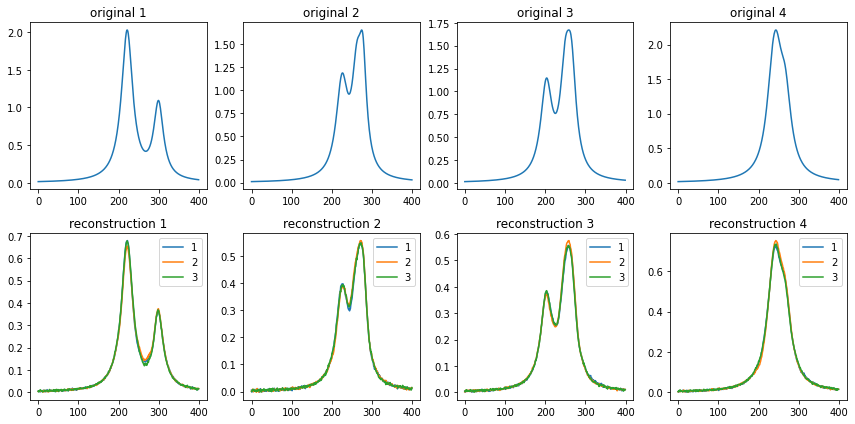

In [29]:
%matplotlib inline

n = 4
test_data_recoverd = autoencoder1.predict(test_data[:n])
plt.figure(figsize=(12, 6))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.plot(test_data[i])
    plt.title("original {}".format(i + 1))
    #plt.gray(); 
    #plt.axis("off")
    
    plt.subplot(2, n, i + 1 + n)
    plt.plot(test_data_recoverd[i][:400], label='1')
    plt.plot(test_data_recoverd[i][400:800], label='2')
    plt.plot(test_data_recoverd[i][800:], label='3')
    plt.title("reconstruction {}".format(i + 1))
    plt.legend()
    #plt.gray(); 
    #plt.axis("off")

plt.tight_layout()
plt.show()

# 실패.ㅡㅡ;; 아니 뭐 이렇게 학습을 해...?